In [1]:
import math
from logging import debug

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import copy
from math import sqrt,ceil
from scipy.stats import linregress
import libraries as lib

C:\Users\bono\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
directory = "../../../../OneDrive - HvA/Logfiles/SOLAR/2024/20241024_sleeptest/0056 - 20241024T115530 1h25m5s 12.315km De Rijp - Uitgeest - De Rijp"
result1 = lib.DataUitzoekenGui(directory)

SelectMultiple(description='Bestanden:', options=('0_Bus.csv', '1_Master_08_05.csv', '2_MPPT_0_05_05.csv', '3_…

Button(button_style='success', description='Bestanden Laden', icon='check', style=ButtonStyle(), tooltip='Klik…

Label(value='')

In [3]:
# Na het laden van de bestanden en het klikken op de knop
# Controleer of 'merged_df' in result zit
if 'merged_df' in result1:
    merged_df1 = result1['merged_df'].copy()
    # Gebruik merged_df zoals je wilt
else:
    print("De data is nog niet geladen.")
merged_df1

1_Datalogger port  1_Dataloggertijd, in s  1_Cycle count  \
Indextijd                                                                   
0 days 00:02:19                NaN                     NaN            NaN   
0 days 00:02:20                9.0                140.4098        145.861   
0 days 00:02:21                9.0                141.4102        146.860   
0 days 00:02:22                9.0                142.4364        147.886   
0 days 00:02:23                9.0                143.4079        148.859   
...                            ...                     ...            ...   
0 days 01:27:32                NaN                     NaN            NaN   
0 days 01:27:33                NaN                     NaN            NaN   
0 days 01:27:34                NaN                     NaN            NaN   
0 days 01:27:35                NaN                     NaN            NaN   
0 days 01:27:36                NaN                     NaN            NaN   

                  1_Tijd  1_Latitude  1_Longitude  \
Indextijd                                           
0 days 00:02:19      NaN         NaN          NaN   
0 days 00:02:20  95531.0   5233.2842     446.5866   
0 days 00:02:21  95532.0   5233.2847     446.5861   
0 days 00:02:22  95533.0   5233.2850     446.5858   
0 days 00:02:23  95534.0   5233.2856     446.5850   
...                  ...         ...          ...   
0 days 01:27:32      NaN         NaN          NaN   
0 days 01:27:33      NaN         NaN          NaN   
0 days 01:27:34      NaN         NaN          NaN   
0 days 01:27:35      NaN         NaN          NaN   
0 days 01:27:36      NaN         NaN          NaN   

                 1_Snelheid over de grond in km/h  1_Richting van de snelheid  \
Indextijd                                                                       
0 days 00:02:19                               NaN                         NaN   
0 days 00:02:20                               3.9                       324.9   
0 days 00:02:21                               3.9                       325.2   
0 days 00:02:22                               3.9                       325.3   
0 days 00:02:23                               3.9                       324.7   
...                                           ...                         ...   
0 days 01:27:32                               NaN                         NaN   
0 days 01:27:33                               NaN                         NaN   
0 days 01:27:34                               NaN                         NaN   
0 days 01:27:35                               NaN                         NaN   
0 days 01:27:36                               NaN                         NaN   

                  1_Datum  1_Magnetische variatie  ...  \
Indextijd                                          ...   
0 days 00:02:19       NaN                     NaN  ...   
0 days 00:02:20  241024.0                     NaN  ...   
0 days 00:02:21  241024.0                     NaN  ...   
0 days 00:02:22  241024.0                     NaN  ...   
0 days 00:02:23  241024.0                     NaN  ...   
...                   ...                     ...  ...   
0 days 01:27:32       NaN                     NaN  ...   
0 days 01:27:33       NaN                     NaN  ...   
0 days 01:27:34       NaN                     NaN  ...   
0 days 01:27:35       NaN                     NaN  ...   
0 days 01:27:36       NaN                     NaN  ...   

                 2_Externe ingangsspanning, in V  \
Indextijd                                          
0 days 00:02:19                         1.293000   
0 days 00:02:20                         1.293000   
0 days 00:02:21                         1.293500   
0 days 00:02:22                         1.292857   
0 days 00:02:23                         1.292667   
...                                          ...   
0 days 01:27:32                         1.320857   
0 days 01:27:33                         1.320857

In [4]:
#filter de eerste 100 waarders erut
merged_df1 = merged_df1.iloc[0:-1]
lib.plot_trajectory_map(merged_df1['1_Latitude'].dropna(), merged_df1['1_Longitude'].dropna(), merged_df1['1_Snelheid over de grond in km/h'].dropna())

In [6]:
#plot the speed of the boat tegen het vermogen van de motor

#filter snelheid onder de 0 eruit
merged_df1 = merged_df1[merged_df1['1_Snelheid tenopzichte van het water in Kilometers per uur'] > 0]

#snelheid boven de 30 eruit
merged_df1 = merged_df1[merged_df1['1_Snelheid tenopzichte van het water in Kilometers per uur'] < 20]

#filter eruit alles acceleraties met .diff() die groter zijn dan 0.1
merged_df1 = merged_df1[merged_df1['1_Snelheid over de grond in km/h'].diff() < 0.1]

#acceleraties boven de -0.1 eruit
merged_df1 = merged_df1[merged_df1['1_Snelheid over de grond in km/h'].diff() > -0.1]

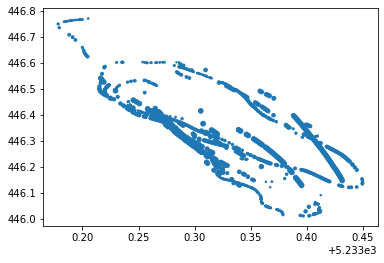

In [8]:
plt.scatter(merged_df1['1_Latitude'].dropna(), merged_df1['1_Longitude'].dropna(), merged_df1['1_Snelheid over de grond in km/h'].dropna())

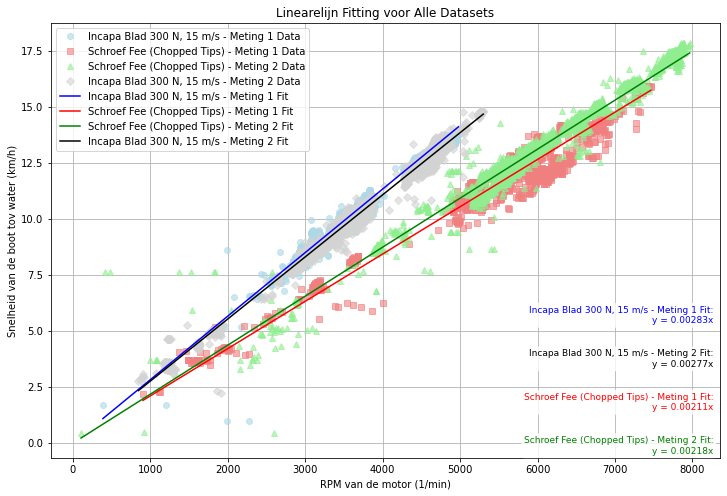

In [42]:
# Data van dataset 1
x1 = merged_df1['2_Current RPM of motor shaft (1/min)'].to_numpy()
y1 = merged_df1['1_Snelheid tenopzichte van het water in Kilometers per uur'].to_numpy()

# Data van dataset 2
x2 = merged_df2['2_Current RPM of motor shaft (1/min)'].to_numpy()
y2 = merged_df2['1_Snelheid tenopzichte van het water in Kilometers per uur'].to_numpy()

# Data van dataset 3
x3 = merged_df3['2_Current RPM of motor shaft (1/min)'].to_numpy()
y3 = merged_df3['1_Snelheid tenopzichte van het water in Kilometers per uur'].to_numpy()

# Data van dataset 4
x4 = merged_df4['2_Current RPM of motor shaft (1/min)'].to_numpy()
y4 = merged_df4['1_Snelheid tenopzichte van het water in Kilometers per uur'].to_numpy()


# Functie om een linearelijn te fitten die door (0,0) gaat
def fit_line(x, y):
    # Pas least squares toe om de parameters te vinden
    beta = np.dot(x, y) / np.dot(x, x)
    return beta

def fit_polynomial(x, y):
    # Ontwerp matrix zonder constante term
    X = np.column_stack(x)
    # Pas least squares toe om de parameters te vinden
    beta, residuals, rank, s = np.linalg.lstsq(X, y, rcond=None)
    return beta

# Kleuren voor de datasets
data_color1 = 'lightblue'
line_color1 = 'blue'

data_color2 = 'lightcoral'
line_color2 = 'red'

data_color3 = 'lightgreen'
line_color3 = 'green'

data_color4 = 'lightgray'
line_color4 = 'black'

# Labels voor de datasets
label1 = 'Incapa Blad 300 N, 15 m/s - Meting 1'
label2 = 'Schroef Fee (Chopped Tips) - Meting 1'
label3 = 'Schroef Fee (Chopped Tips) - Meting 2'
label4 = 'Incapa Blad 300 N, 15 m/s - Meting 2'

# Fit voor dataset 1
beta1 = fit_line(x1, y1)
x_fit1 = np.linspace(min(x1), max(x1), 100)
y_fit1 = beta1*x_fit1

# Fit voor dataset 2
beta2 = fit_line(x2, y2)
x_fit2 = np.linspace(min(x2), max(x2), 100)
y_fit2 = beta2*x_fit2

# Fit voor dataset 3
beta3 = fit_line(x3, y3)
x_fit3 = np.linspace(min(x3), max(x3), 100)
y_fit3 = beta3*x_fit3

# Fit voor dataset 4
beta4 = fit_line(x4, y4)
x_fit4 = np.linspace(min(x4), max(x4), 100)
y_fit4 = beta4*x_fit4

# Plot de datapunten eerst
plt.figure(figsize=(12, 8))

# Plot datapunten voor alle datasets met transparantie en verschillende markers
plt.plot(x1, y1, 'o', color=data_color1, alpha=0.6, label=f'{label1} Data')
plt.plot(x2, y2, 's', color=data_color2, alpha=0.6, label=f'{label2} Data')
plt.plot(x3, y3, '^', color=data_color3, alpha=0.6, label=f'{label3} Data')
plt.plot(x4, y4, 'D', color=data_color4, alpha=0.6, label=f'{label4} Data')

# Plot de trendlijnen daarna met verschillende kleuren
plt.plot(x_fit1, y_fit1, '-', color=line_color1, label=f'{label1} Fit')
plt.plot(x_fit2, y_fit2, '-', color=line_color2, label=f'{label2} Fit')
plt.plot(x_fit3, y_fit3, '-', color=line_color3, label=f'{label3} Fit')
plt.plot(x_fit4, y_fit4, '-', color=line_color4, label=f'{label4} Fit')

# Voeg de formules van de trendlijnen toe met dezelfde kleur als de trendlijnen
equation1 = f'{label1} Fit:\ny = {beta1:.5f}x'
equation2 = f'{label2} Fit:\ny = {beta2:.5f}x'
equation3 = f'{label3} Fit:\ny = {beta3:.5f}x'
equation4 = f'{label4} Fit:\ny = {beta4:.5f}x'

# Plaats de formules rechtsonder in de grafiek met een doorzichtige achtergrond
bbox_props = dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8, edgecolor="none")

plt.text(0.99, 0.35, equation1, transform=plt.gca().transAxes, fontsize=9,
         verticalalignment='top', horizontalalignment='right', color=line_color1,
         bbox=bbox_props)
plt.text(0.99, 0.25, equation4, transform=plt.gca().transAxes, fontsize=9,
         verticalalignment='top', horizontalalignment='right', color=line_color4,
         bbox=bbox_props)
plt.text(0.99, 0.15, equation2, transform=plt.gca().transAxes, fontsize=9,
         verticalalignment='top', horizontalalignment='right', color=line_color2,
         bbox=bbox_props)
plt.text(0.99, 0.05, equation3, transform=plt.gca().transAxes, fontsize=9,
         verticalalignment='top', horizontalalignment='right', color=line_color3,
         bbox=bbox_props)

plt.xlabel('RPM van de motor (1/min)')
plt.ylabel('Snelheid van de boot tov water (km/h)')
plt.legend()
plt.title('Linearelijn Fitting voor Alle Datasets')
plt.grid(True)
plt.show()

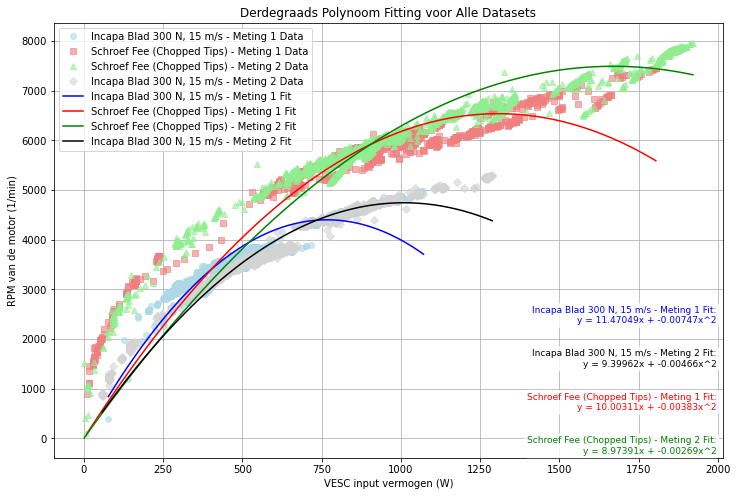

In [51]:
# Data van dataset 1
y1 = merged_df1['2_Current RPM of motor shaft (1/min)'].to_numpy()
x1 = merged_df1['2_VESC input vermogen (W)'].to_numpy()

# Data van dataset 2
y2 = merged_df2['2_Current RPM of motor shaft (1/min)'].to_numpy()
x2 = merged_df2['2_VESC input vermogen (W)'].to_numpy()

# Data van dataset 3
y3 = merged_df3['2_Current RPM of motor shaft (1/min)'].to_numpy()
x3 = merged_df3['2_VESC input vermogen (W)'].to_numpy()

# Data van dataset 4
y4 = merged_df4['2_Current RPM of motor shaft (1/min)'].to_numpy()
x4 = merged_df4['2_VESC input vermogen (W)'].to_numpy()

# Functie om een tweedegraads polynoom te fitten die door (0,0) gaat
def fit_polynomial_tweedegraads(x, y):
    # Ontwerp matrix zonder constante term
    X = np.column_stack((x, x**2))
    # Pas least squares toe om de parameters te vinden
    beta, residuals, rank, s = np.linalg.lstsq(X, y, rcond=None)
    return beta

# Kleuren voor de datasets
data_color1 = 'lightblue'
line_color1 = 'blue'

data_color2 = 'lightcoral'
line_color2 = 'red'

data_color3 = 'lightgreen'
line_color3 = 'green'

data_color4 = 'lightgray'
line_color4 = 'black'

# Labels voor de datasets
label1 = 'Incapa Blad 300 N, 15 m/s - Meting 1'
label2 = 'Schroef Fee (Chopped Tips) - Meting 1'
label3 = 'Schroef Fee (Chopped Tips) - Meting 2'
label4 = 'Incapa Blad 300 N, 15 m/s - Meting 2'

# Fit voor dataset 1
beta1 = fit_polynomial_tweedegraads(x1, y1)
x_fit1 = np.linspace(min(x1), max(x1), 100)
y_fit1 = beta1[0]*x_fit1 + beta1[1]*x_fit1**2

# Fit voor dataset 2
beta2 = fit_polynomial_tweedegraads(x2, y2)
x_fit2 = np.linspace(min(x2), max(x2), 100)
y_fit2 = beta2[0]*x_fit2 + beta2[1]*x_fit2**2

# Fit voor dataset 3
beta3 = fit_polynomial_tweedegraads(x3, y3)
x_fit3 = np.linspace(min(x3), max(x3), 100)
y_fit3 = beta3[0]*x_fit3 + beta3[1]*x_fit3**2

# Fit voor dataset 4
beta4 = fit_polynomial_tweedegraads(x4, y4)
x_fit4 = np.linspace(min(x4), max(x4), 100)
y_fit4 = beta4[0]*x_fit4 + beta4[1]*x_fit4**2

# Plot de datapunten eerst
plt.figure(figsize=(12, 8))

# Plot datapunten voor alle datasets met transparantie en verschillende markers
plt.plot(x1, y1, 'o', color=data_color1, alpha=0.6, label=f'{label1} Data')
plt.plot(x2, y2, 's', color=data_color2, alpha=0.6, label=f'{label2} Data')
plt.plot(x3, y3, '^', color=data_color3, alpha=0.6, label=f'{label3} Data')
plt.plot(x4, y4, 'D', color=data_color4, alpha=0.6, label=f'{label4} Data')

# Plot de trendlijnen daarna met verschillende kleuren
plt.plot(x_fit1, y_fit1, '-', color=line_color1, label=f'{label1} Fit')
plt.plot(x_fit2, y_fit2, '-', color=line_color2, label=f'{label2} Fit')
plt.plot(x_fit3, y_fit3, '-', color=line_color3, label=f'{label3} Fit')
plt.plot(x_fit4, y_fit4, '-', color=line_color4, label=f'{label4} Fit')

# Voeg de formules van de trendlijnen toe met dezelfde kleur als de trendlijnen
equation1 = f'{label1} Fit:\ny = {beta1[0]:.5f}x + {beta1[1]:.5f}x^2'
equation2 = f'{label2} Fit:\ny = {beta2[0]:.5f}x + {beta2[1]:.5f}x^2'
equation3 = f'{label3} Fit:\ny = {beta3[0]:.5f}x + {beta3[1]:.5f}x^2'
equation4 = f'{label4} Fit:\ny = {beta4[0]:.5f}x + {beta4[1]:.5f}x^2'

# Plaats de formules rechtsonder in de grafiek met een doorzichtige achtergrond
bbox_props = dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8, edgecolor="none")

plt.text(0.99, 0.35, equation1, transform=plt.gca().transAxes, fontsize=9,
         verticalalignment='top', horizontalalignment='right', color=line_color1,
         bbox=bbox_props)
plt.text(0.99, 0.25, equation4, transform=plt.gca().transAxes, fontsize=9,
         verticalalignment='top', horizontalalignment='right', color=line_color4,
         bbox=bbox_props)
plt.text(0.99, 0.15, equation2, transform=plt.gca().transAxes, fontsize=9,
         verticalalignment='top', horizontalalignment='right', color=line_color2,
         bbox=bbox_props)
plt.text(0.99, 0.05, equation3, transform=plt.gca().transAxes, fontsize=9,
         verticalalignment='top', horizontalalignment='right', color=line_color3,
         bbox=bbox_props)

plt.xlabel('VESC input vermogen (W)')
plt.ylabel('RPM van de motor (1/min)')
plt.legend()
plt.title('Derdegraads Polynoom Fitting voor Alle Datasets')
plt.grid(True)
plt.show()


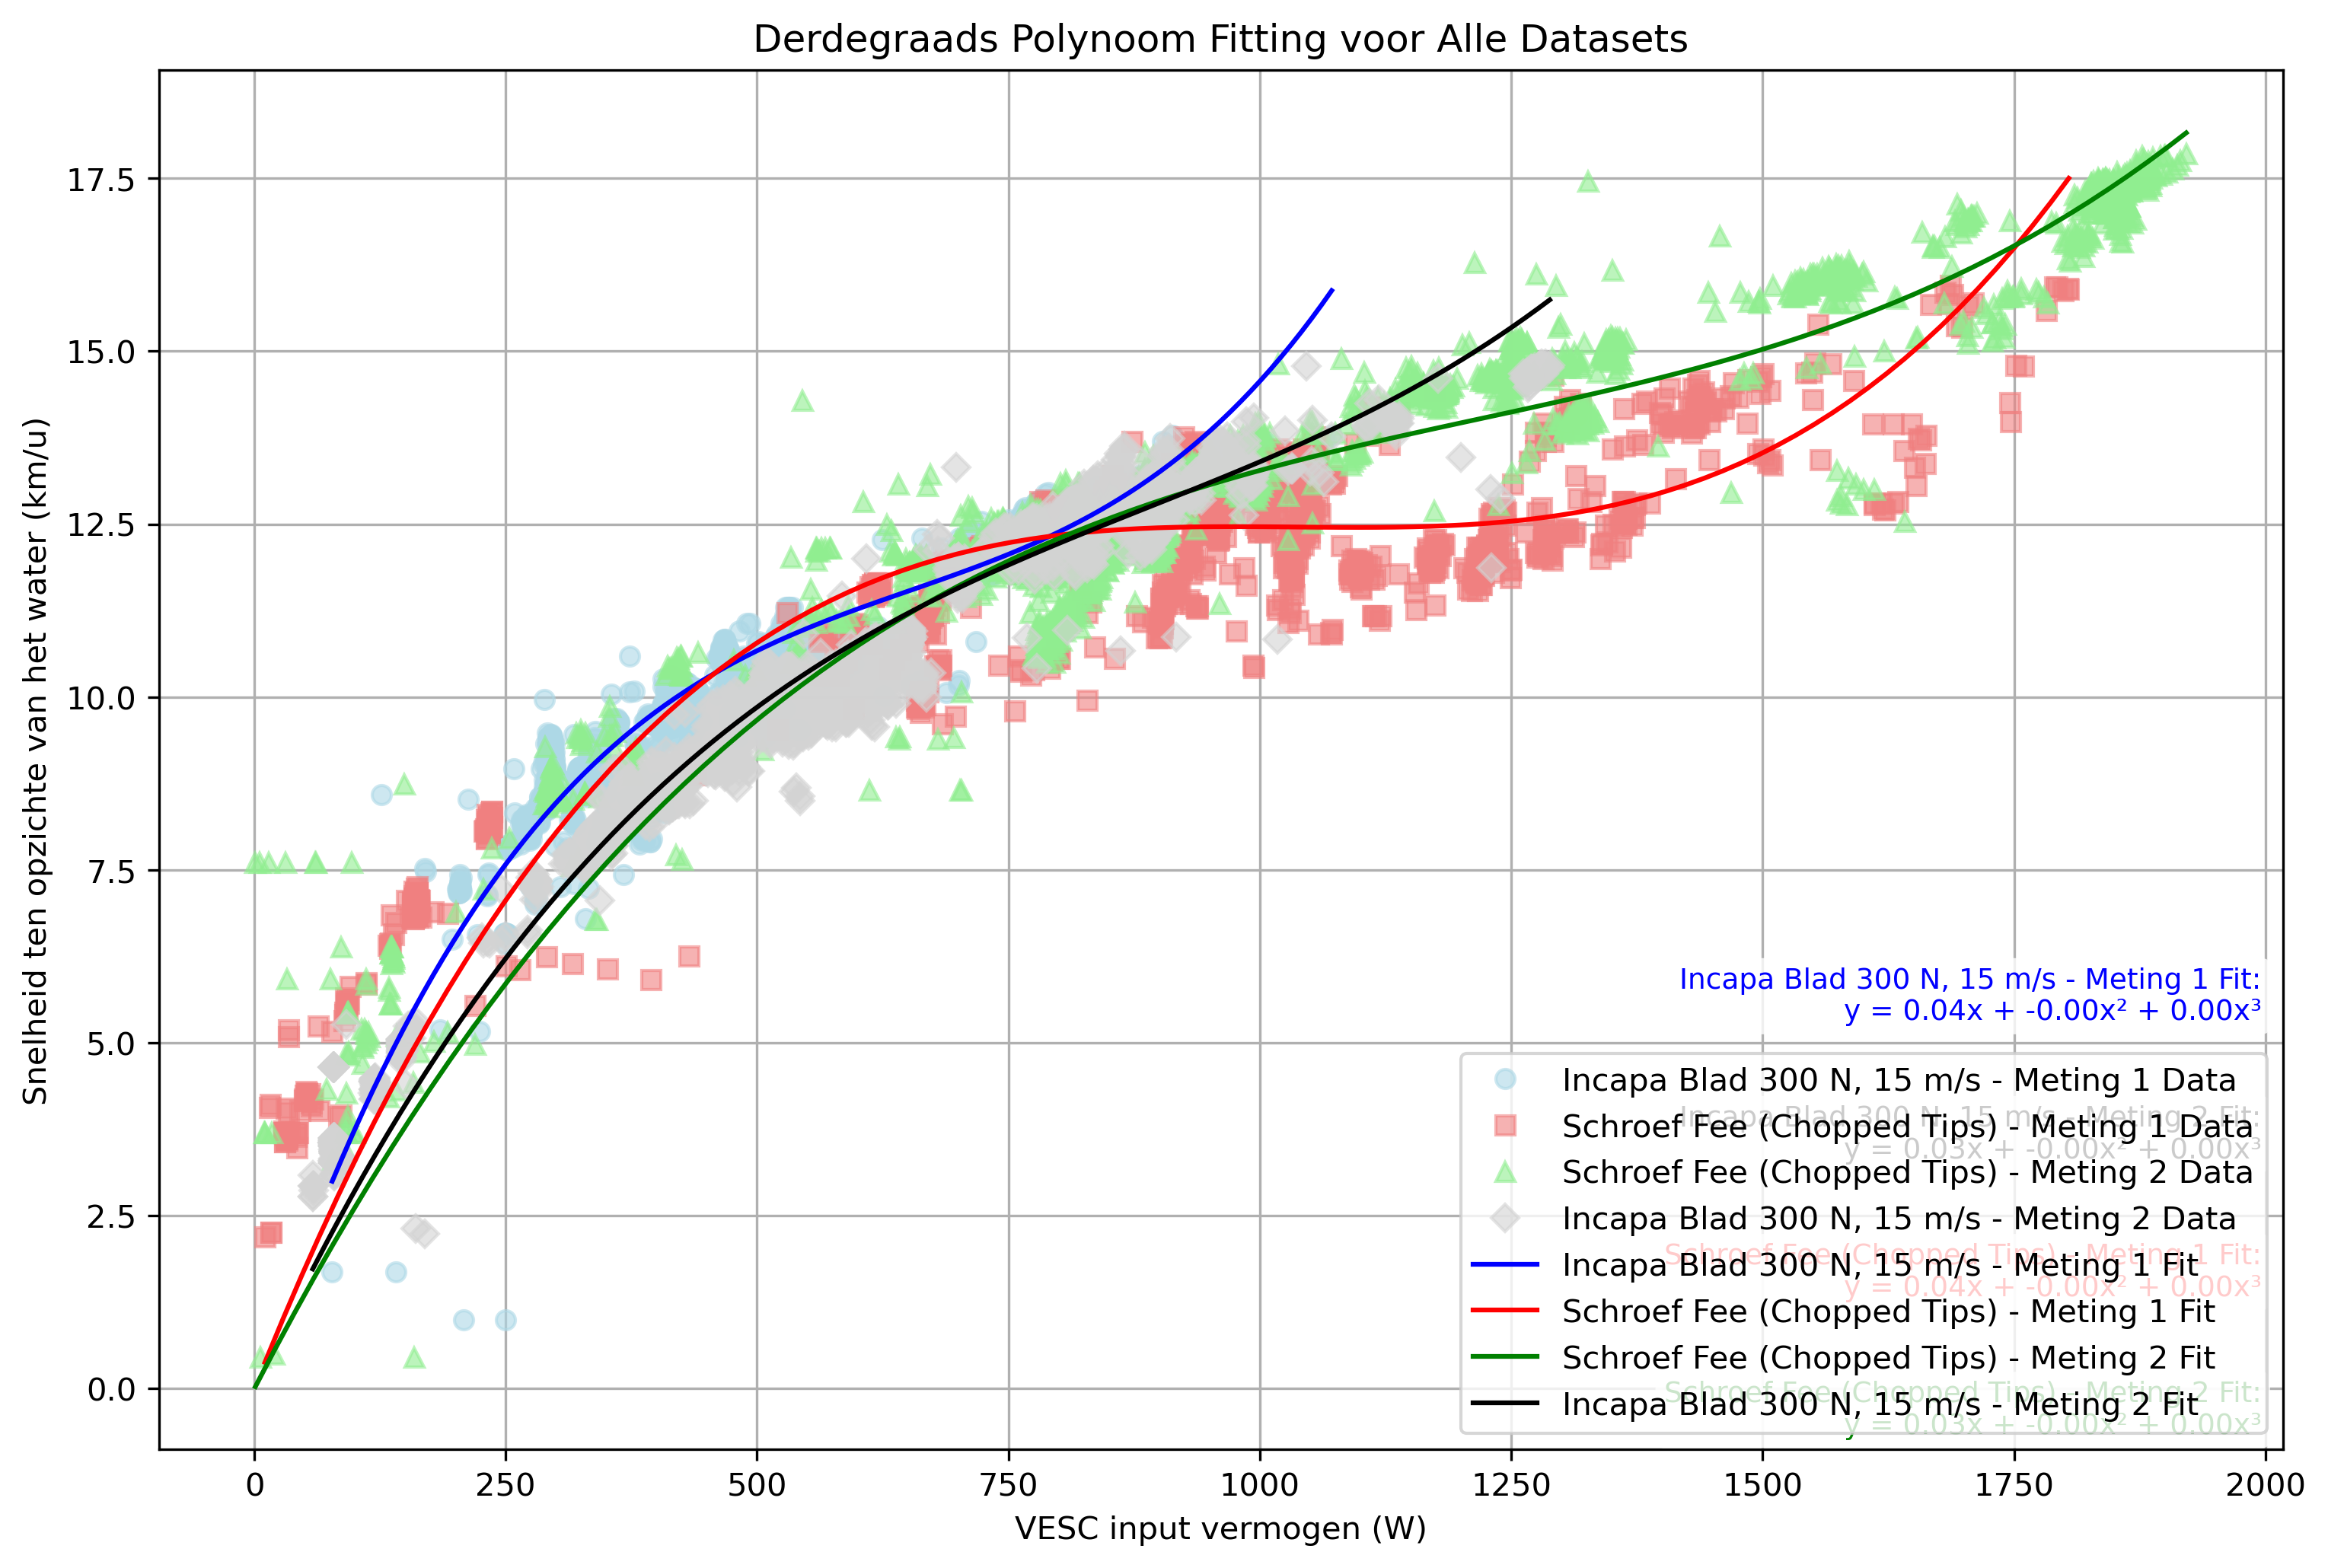

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Data van dataset 1
y1 = merged_df1['1_Snelheid tenopzichte van het water in Kilometers per uur'].to_numpy()
x1 = merged_df1['2_VESC input vermogen (W)'].to_numpy()

# Data van dataset 2
y2 = merged_df2['1_Snelheid tenopzichte van het water in Kilometers per uur'].to_numpy()
x2 = merged_df2['2_VESC input vermogen (W)'].to_numpy()

# Data van dataset 3
y3 = merged_df3['1_Snelheid tenopzichte van het water in Kilometers per uur'].to_numpy()
x3 = merged_df3['2_VESC input vermogen (W)'].to_numpy()

# Data van dataset 4
y4 = merged_df4['1_Snelheid tenopzichte van het water in Kilometers per uur'].to_numpy()
x4 = merged_df4['2_VESC input vermogen (W)'].to_numpy()

#Functie om een tweedegraads polynoom te fitten die door (0,0) gaat




def fit_polynomial(x, y):
    # Ontwerp matrix zonder constante term
    X = np.column_stack((x, x**2, x**3))
    # Pas least squares toe om de parameters te vinden
    beta, residuals, rank, s = np.linalg.lstsq(X, y, rcond=None)
    return beta

# Kleuren voor de datasets
data_color1 = 'lightblue'
line_color1 = 'blue'

data_color2 = 'lightcoral'
line_color2 = 'red'

data_color3 = 'lightgreen'
line_color3 = 'green'

data_color4 = 'lightgray'
line_color4 = 'black'

# Labels voor de datasets
label1 = 'Incapa Blad 300 N, 15 m/s - Meting 1'
label2 = 'Schroef Fee (Chopped Tips) - Meting 1'
label3 = 'Schroef Fee (Chopped Tips) - Meting 2'
label4 = 'Incapa Blad 300 N, 15 m/s - Meting 2'

# Fit voor dataset 1
beta1 = fit_polynomial(x1, y1)
x_fit1 = np.linspace(min(x1), max(x1), 100)
y_fit1 = beta1[0]*x_fit1 + beta1[1]*x_fit1**2 + beta1[2]*x_fit1**3

# Fit voor dataset 2
beta2 = fit_polynomial(x2, y2)
x_fit2 = np.linspace(min(x2), max(x2), 100)
y_fit2 = beta2[0]*x_fit2 + beta2[1]*x_fit2**2 + beta2[2]*x_fit2**3

# Fit voor dataset 3
beta3 = fit_polynomial(x3, y3)
x_fit3 = np.linspace(min(x3), max(x3), 100)
y_fit3 = beta3[0]*x_fit3 + beta3[1]*x_fit3**2 + beta3[2]*x_fit3**3

# Fit voor dataset 4
beta4 = fit_polynomial(x4, y4)
x_fit4 = np.linspace(min(x4), max(x4), 100)
y_fit4 = beta4[0]*x_fit4 + beta4[1]*x_fit4**2 + beta4[2]*x_fit4**3

# Plot de datapunten eerst
plt.figure(figsize=(12, 8),dpi=300)

# Plot datapunten voor alle datasets met transparantie en verschillende markers
plt.plot(x1, y1, 'o', color=data_color1, alpha=0.6, label=f'{label1} Data')
plt.plot(x2, y2, 's', color=data_color2, alpha=0.6, label=f'{label2} Data')
plt.plot(x3, y3, '^', color=data_color3, alpha=0.6, label=f'{label3} Data')
plt.plot(x4, y4, 'D', color=data_color4, alpha=0.6, label=f'{label4} Data')

# Plot de trendlijnen daarna met verschillende kleuren
plt.plot(x_fit1, y_fit1, '-', color=line_color1, label=f'{label1} Fit')
plt.plot(x_fit2, y_fit2, '-', color=line_color2, label=f'{label2} Fit')
plt.plot(x_fit3, y_fit3, '-', color=line_color3, label=f'{label3} Fit')
plt.plot(x_fit4, y_fit4, '-', color=line_color4, label=f'{label4} Fit')

# Voeg de formules van de trendlijnen toe met dezelfde kleur als de trendlijnen
equation1 = f'{label1} Fit:\ny = {beta1[0]:.2f}x + {beta1[1]:.2f}x² + {beta1[2]:.2f}x³'
equation2 = f'{label2} Fit:\ny = {beta2[0]:.2f}x + {beta2[1]:.2f}x² + {beta2[2]:.2f}x³'
equation3 = f'{label3} Fit:\ny = {beta3[0]:.2f}x + {beta3[1]:.2f}x² + {beta3[2]:.2f}x³'
equation4 = f'{label4} Fit:\ny = {beta4[0]:.2f}x + {beta4[1]:.2f}x² + {beta4[2]:.2f}x³'

# Plaats de formules rechtsonder in de grafiek met een doorzichtige achtergrond
bbox_props = dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8, edgecolor="none")

plt.text(0.99, 0.35, equation1, transform=plt.gca().transAxes, fontsize=9,
         verticalalignment='top', horizontalalignment='right', color=line_color1,
         bbox=bbox_props)
plt.text(0.99, 0.25, equation4, transform=plt.gca().transAxes, fontsize=9,
         verticalalignment='top', horizontalalignment='right', color=line_color4,
         bbox=bbox_props)
plt.text(0.99, 0.15, equation2, transform=plt.gca().transAxes, fontsize=9,
         verticalalignment='top', horizontalalignment='right', color=line_color2,
         bbox=bbox_props)
plt.text(0.99, 0.05, equation3, transform=plt.gca().transAxes, fontsize=9,
         verticalalignment='top', horizontalalignment='right', color=line_color3,
         bbox=bbox_props)

plt.xlabel('VESC input vermogen (W)')
plt.ylabel('Snelheid ten opzichte van het water (km/u)')
plt.legend()
plt.title('Derdegraads Polynoom Fitting voor Alle Datasets')
plt.grid(True)
plt.show()


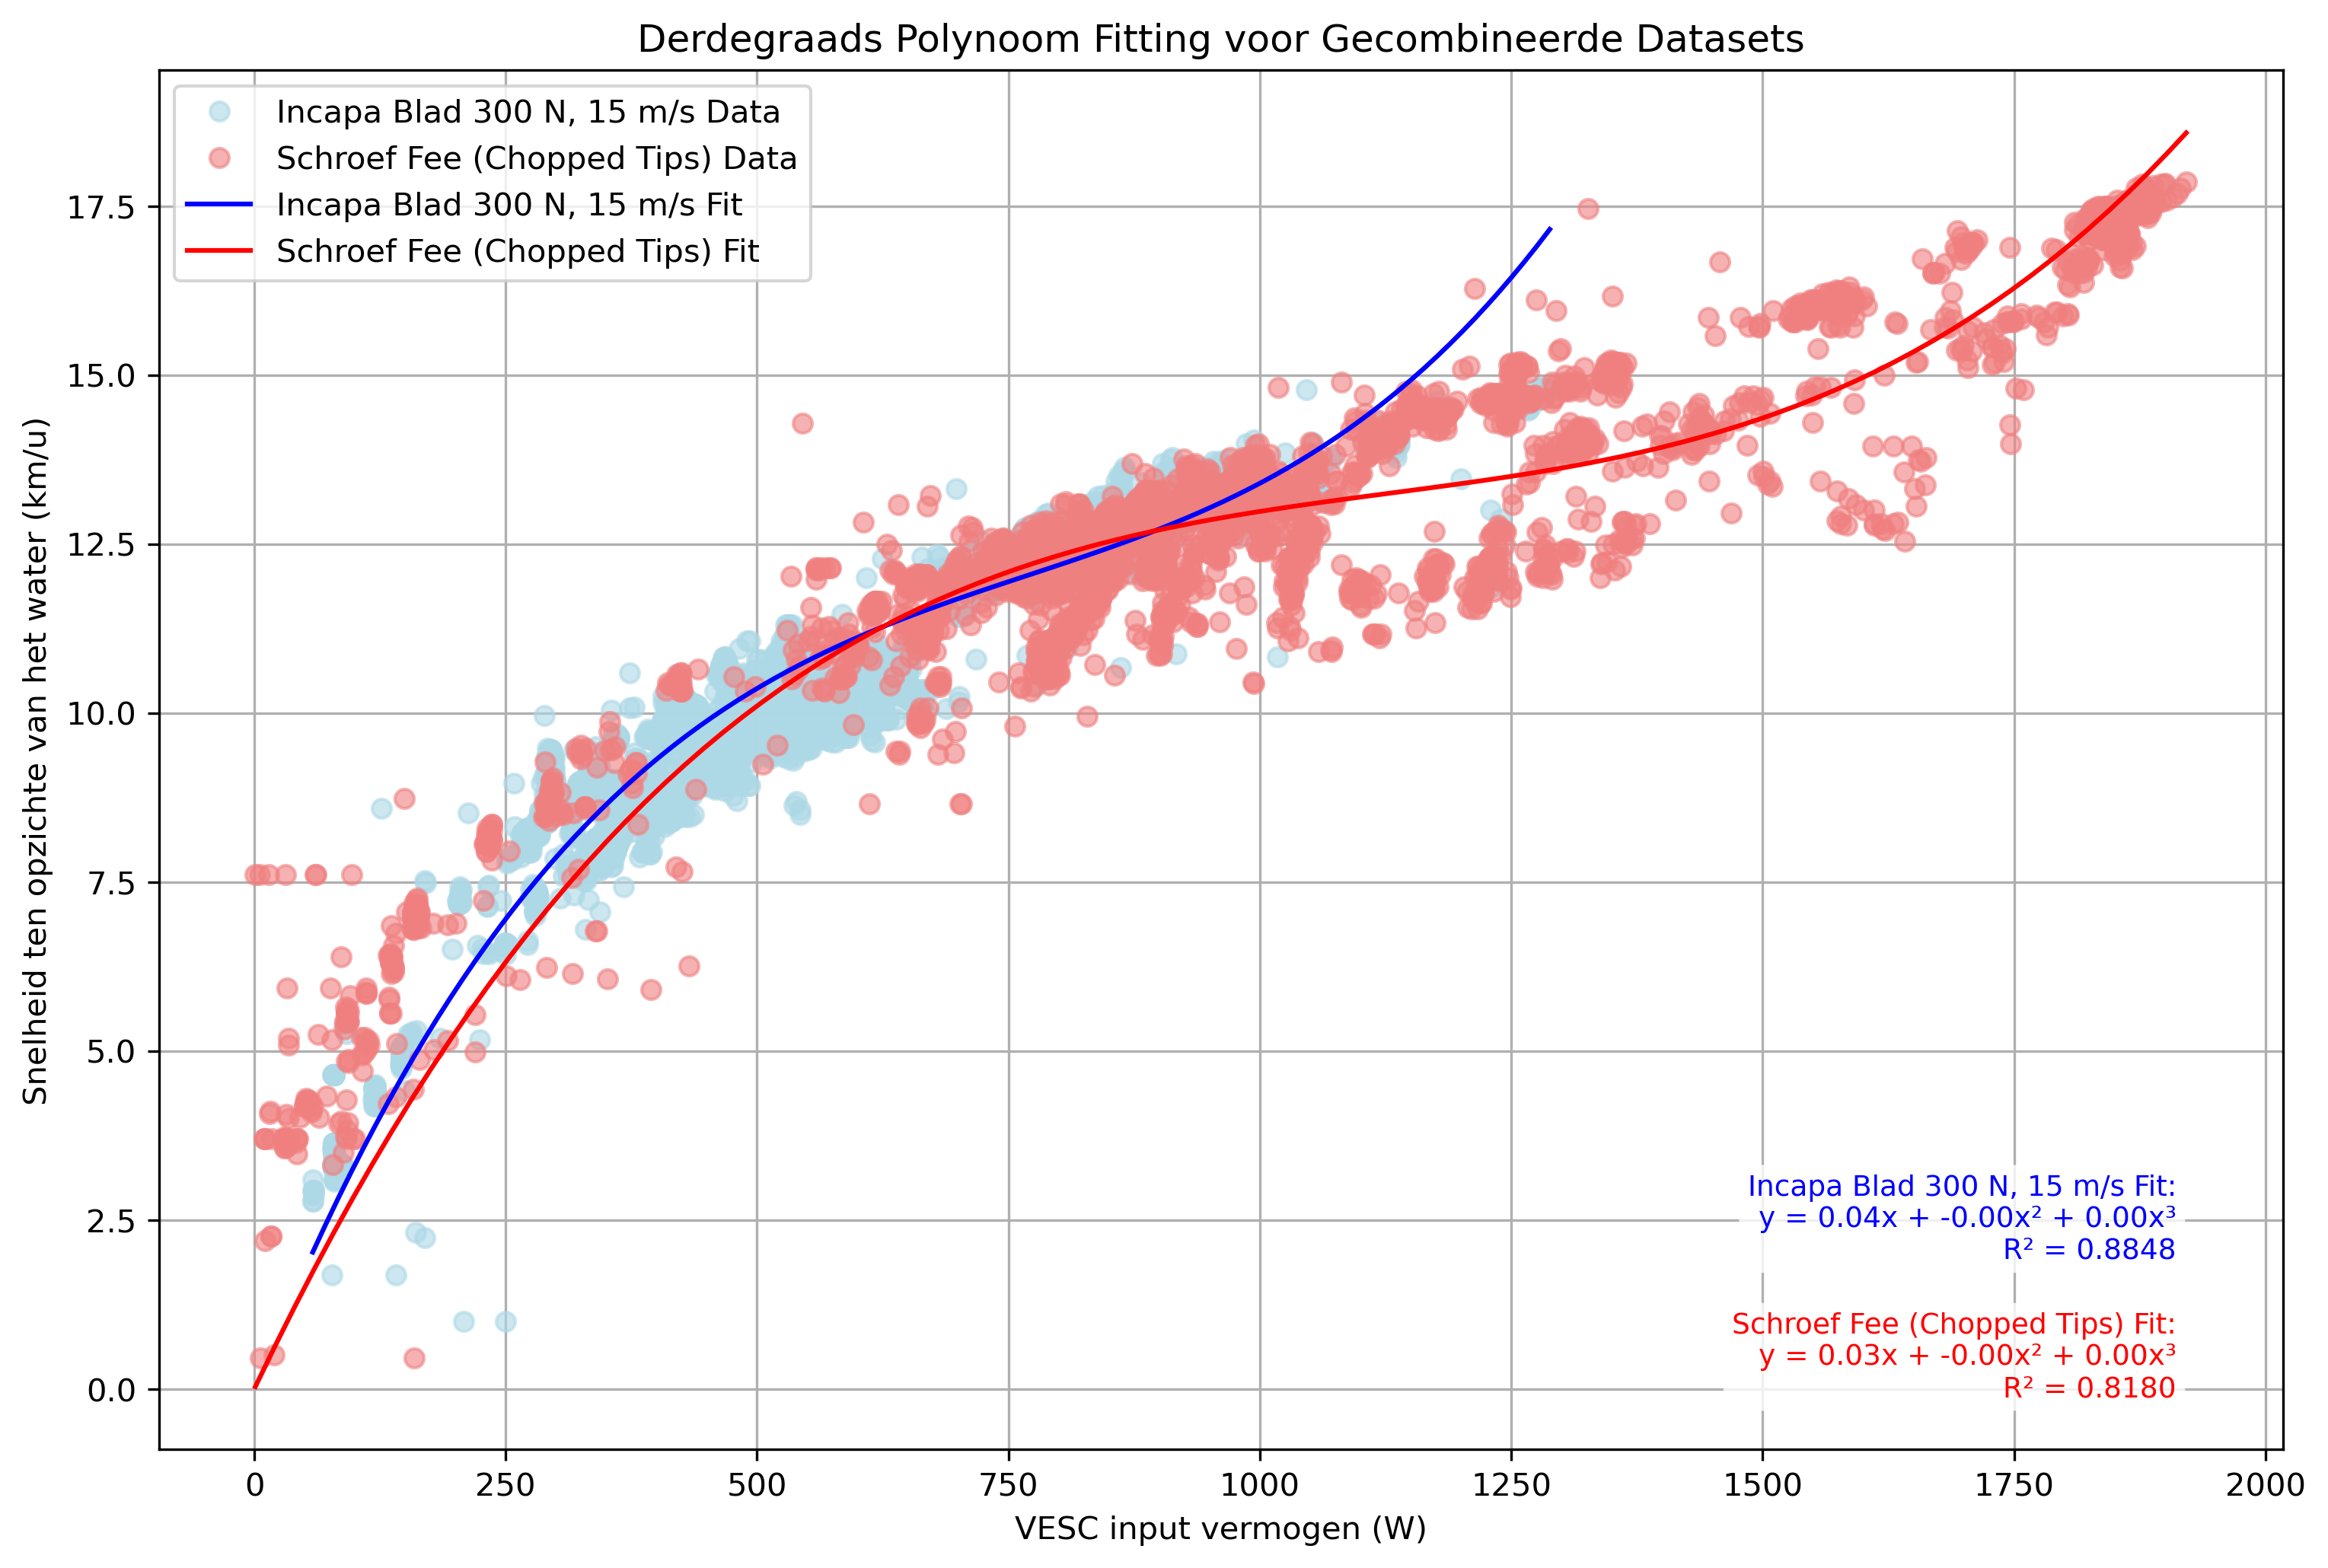

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Data van dataset 1
y1 = merged_df1['1_Snelheid tenopzichte van het water in Kilometers per uur'].to_numpy()
x1 = merged_df1['2_VESC input vermogen (W)'].to_numpy()

# Data van dataset 2
y2 = merged_df2['1_Snelheid tenopzichte van het water in Kilometers per uur'].to_numpy()
x2 = merged_df2['2_VESC input vermogen (W)'].to_numpy()

# Data van dataset 3
y3 = merged_df3['1_Snelheid tenopzichte van het water in Kilometers per uur'].to_numpy()
x3 = merged_df3['2_VESC input vermogen (W)'].to_numpy()

# Data van dataset 4
y4 = merged_df4['1_Snelheid tenopzichte van het water in Kilometers per uur'].to_numpy()
x4 = merged_df4['2_VESC input vermogen (W)'].to_numpy()

# Combineer datasets 1 en 4 voor Incapa Blad 300 N, 15 m/s
x_incapa = np.concatenate([x1, x4])
y_incapa = np.concatenate([y1, y4])

# Combineer datasets 2 en 3 voor Schroef Fee (Chopped Tips)
x_schroef = np.concatenate([x2, x3])
y_schroef = np.concatenate([y2, y3])

# Functie om een derdegraads polynoom te fitten die door (0,0) gaat en R² te berekenen
def fit_polynomial(x, y):
    # Ontwerp matrix zonder constante term
    X = np.column_stack((x, x**2, x**3))
    # Pas least squares toe om de parameters te vinden
    beta, residuals, rank, s = np.linalg.lstsq(X, y, rcond=None)
    # Bereken y_fit
    y_fit = X @ beta
    # Bereken R²
    ss_res = np.sum((y - y_fit)**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    r_squared = 1 - (ss_res / ss_tot)
    return beta, r_squared

# Kleuren voor de datasets
data_color_incapa = 'lightblue'
line_color_incapa = 'blue'

data_color_schroef = 'lightcoral'
line_color_schroef = 'red'

# Labels voor de datasets
label_incapa = 'Incapa Blad 300 N, 15 m/s'
label_schroef = 'Schroef Fee (Chopped Tips)'

# Fit voor Incapa Blad
beta_incapa, r2_incapa = fit_polynomial(x_incapa, y_incapa)
x_fit_incapa = np.linspace(min(x_incapa), max(x_incapa), 100)
y_fit_incapa = beta_incapa[0]*x_fit_incapa + beta_incapa[1]*x_fit_incapa**2 + beta_incapa[2]*x_fit_incapa**3

# Fit voor Schroef Fee
beta_schroef, r2_schroef = fit_polynomial(x_schroef, y_schroef)
x_fit_schroef = np.linspace(min(x_schroef), max(x_schroef), 100)
y_fit_schroef = beta_schroef[0]*x_fit_schroef + beta_schroef[1]*x_fit_schroef**2 + beta_schroef[2]*x_fit_schroef**3

# Plot de datapunten eerst
plt.figure(figsize=(12, 8),dpi=300)

# Plot datapunten voor de gecombineerde datasets met transparantie
plt.plot(x_incapa, y_incapa, 'o', color=data_color_incapa, alpha=0.6, label=f'{label_incapa} Data')
plt.plot(x_schroef, y_schroef, 'o', color=data_color_schroef, alpha=0.6, label=f'{label_schroef} Data')

# Plot de trendlijnen daarna met verschillende kleuren
plt.plot(x_fit_incapa, y_fit_incapa, '-', color=line_color_incapa, label=f'{label_incapa} Fit')
plt.plot(x_fit_schroef, y_fit_schroef, '-', color=line_color_schroef, label=f'{label_schroef} Fit')

# Voeg de formules van de trendlijnen toe met R²-waarden
equation_incapa = f'{label_incapa} Fit:\ny = {beta_incapa[0]:.2f}x + {beta_incapa[1]:.2f}x² + {beta_incapa[2]:.2f}x³\nR² = {r2_incapa:.4f}'
equation_schroef = f'{label_schroef} Fit:\ny = {beta_schroef[0]:.2f}x + {beta_schroef[1]:.2f}x² + {beta_schroef[2]:.2f}x³\nR² = {r2_schroef:.4f}'

# Plaats de formules rechtsonder in de grafiek met een doorzichtige achtergrond
bbox_props = dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8, edgecolor="none")

plt.text(0.95, 0.20, equation_incapa, transform=plt.gca().transAxes, fontsize=9,
         verticalalignment='top', horizontalalignment='right', color=line_color_incapa,
         bbox=bbox_props)
plt.text(0.95, 0.10, equation_schroef, transform=plt.gca().transAxes, fontsize=9,
         verticalalignment='top', horizontalalignment='right', color=line_color_schroef,
         bbox=bbox_props)

plt.xlabel('VESC input vermogen (W)')
plt.ylabel('Snelheid ten opzichte van het water (km/u)')
plt.legend()
plt.title('Derdegraads Polynoom Fitting voor Gecombineerde Datasets')
plt.grid(True)
plt.show()

In [75]:
lib.plot_trajectory_map(merged_df1['1_Latitude'].dropna(), merged_df1['1_Longitude'].dropna(), merged_df1['1_Snelheid over de grond in km/h'].dropna())

In [ ]:
lib.plot_trajectory_map(merged_df2['1_Latitude'].dropna(), merged_df2['1_Longitude'].dropna(), merged_df2['1_Snelheid over de grond in km/h'].dropna())

In [7]:
#6_Totale accu stroom gefilterd in Ampère
#6_Totale accu stroom in Ampère
#6_Totale accu spanning in Volt


#display all usful columns form filtered_df
data = merged_df[[
'6_Discharge 0 spanning',
'6_Discharge 0 stroom',
                  
'7_Latitude', 
'7_Longitude', 
'7_Snelheid over de grond in km/h',
"7_Snelheid tenopzichte van het water in Kilometers per uur",


'2_Pirano 2',

'1_Paneel 1 ingangsspanning, in V',
'2_Paneel 1 ingangsspanning, in V',
'3_Paneel 1 ingangsspanning, in V',
'4_Paneel 1 ingangsspanning, in V',
'5_Paneel 1 ingangsspanning, in V',
'1_Paneel 2 ingangsspanning, in V',
'2_Paneel 2 ingangsspanning, in V',
'3_Paneel 2 ingangsspanning, in V',
'4_Paneel 2 ingangsspanning, in V',
'5_Paneel 2 ingangsspanning, in V',
'1_Paneel 1 ingangsstroom, in I',
'1_Paneel 2 ingangsstroom, in I',
'2_Paneel 1 ingangsstroom, in I',
'2_Paneel 2 ingangsstroom, in I',
'3_Paneel 1 ingangsstroom, in I',
'3_Paneel 2 ingangsstroom, in I',
'4_Paneel 1 ingangsstroom, in I',
'4_Paneel 2 ingangsstroom, in I',
'5_Paneel 1 ingangsstroom, in I',
'5_Paneel 2 ingangsstroom, in I',
    
'1_Uitgangsspanning, in V',
'2_Uitgangsspanning, in V',
'3_Uitgangsspanning, in V',
'4_Uitgangsspanning, in V',
'5_Uitgangsspanning, in V',
'1_Kanaal 1 uitgangsstroom, in I',
'1_Kanaal 2 uitgangsstroom, in I',
'2_Kanaal 1 uitgangsstroom, in I',
'2_Kanaal 2 uitgangsstroom, in I',
'3_Kanaal 1 uitgangsstroom, in I',
'3_Kanaal 2 uitgangsstroom, in I',
'4_Kanaal 1 uitgangsstroom, in I',
'4_Kanaal 2 uitgangsstroom, in I',
'5_Kanaal 1 uitgangsstroom, in I',
'5_Kanaal 2 uitgangsstroom, in I',
"6_Totale accu stroom gefilterd in Ampère",
'6_Totale accu stroom in Ampère',
'6_Totale accu spanning in Volt',
'8_VESC input voltage (V)',
'8_VESC input current (A)',
'8_Motor current (A)',
'8_Current duty cycle (fraction between 0 and 1)']].copy()

In [8]:
#data["8_VESC input vermogen (W)"] = data['8_VESC input current (A)']*data['8_VESC input voltage (V)']
#data["7_Acceleratie boot tov grond"] = data["7_Snelheid over de grond in km/h"].diff()
#data["7_Acceleratie boot tov water"] = data["7_Snelheid tenopzichte van het water in Kilometers per uur"].diff()

In [9]:
data

6_Discharge 0 spanning  6_Discharge 0 stroom  7_Latitude  \
Indextijd                                                                   
0 days 00:02:16                     NaN                   NaN         NaN   
0 days 00:02:17                 30.2000              0.364000         NaN   
0 days 00:02:18                 30.2000              0.363875         NaN   
0 days 00:02:19                 30.2000              0.363000   4535.2724   
0 days 00:02:20                 30.2000              0.364250   4535.2724   
...                                 ...                   ...         ...   
0 days 01:59:10                 30.3875              0.474000   4530.7201   
0 days 01:59:11                 30.3000              0.453000         NaN   
0 days 01:59:12                     NaN                   NaN         NaN   
0 days 01:59:13                     NaN                   NaN         NaN   
0 days 01:59:14                     NaN                   NaN         NaN   

                 7_Longitude  7_Snelheid over de grond in km/h  \
Indextijd                                                        
0 days 00:02:16          NaN                               NaN   
0 days 00:02:17          NaN                               NaN   
0 days 00:02:18          NaN                               NaN   
0 days 00:02:19     446.5343                               0.0   
0 days 00:02:20     446.5343                               0.0   
...                      ...                               ...   
0 days 01:59:10     451.1766                               0.0   
0 days 01:59:11          NaN                               NaN   
0 days 01:59:12          NaN                               NaN   
0 days 01:59:13          NaN                               NaN   
0 days 01:59:14          NaN                               NaN   

                 7_Snelheid tenopzichte van het water in Kilometers per uur  \
Indextijd                                                                     
0 days 00:02:16                                                NaN            
0 days 00:02:17                                                NaN            
0 days 00:02:18                                                NaN            
0 days 00:02:19                                                0.0            
0 days 00:02:20                                                0.0            
...                                                            ...            
0 days 01:59:10                                                0.0            
0 days 01:59:11                                                NaN            
0 days 01:59:12                                                NaN            
0 days 01:59:13                                                NaN            
0 days 01:59:14                                                NaN            

                 2_Pirano 2  1_Paneel 1 ingangsspanning, in V  \
Indextijd                                                       
0 days 00:02:16  262.000000                         -0.064136   
0 days 00:02:17  262.000000                         -0.063877   
0 days 00:02:18  262.000000                         -0.064413   
0 days 00:02:19  262.000000                         -0.064234   
0 days 00:02:20  262.244898                         -0.064564   
...                     ...                               ...   
0 days 01:59:10  448.000000                         19.669740   
0 days 01:59:11  448.000000                         18.410894   
0 days 01:59:12  448.000000                          8.141278   
0 days 01:59:13  448.000000                          6.352528   
0 days 01:59:14         NaN                               NaN   

                2_Paneel 1 ingangsspanning, in V  \
Indextijd                                          
0 days 00:02:16                           -0.113   
0 days 00:02:17                           -0.113   
0 days 00:02:18                           -0.112   
0 days 00:02:19       

In [10]:
data['8_VESC input voltage (V)']

Indextijd
0 days 00:02:16   NaN
0 days 00:02:17   NaN
0 days 00:02:18   NaN
0 days 00:02:19   NaN
0 days 00:02:20   NaN
                   ..
0 days 01:59:10   NaN
0 days 01:59:11   NaN
0 days 01:59:12   NaN
0 days 01:59:13   NaN
0 days 01:59:14   NaN
Freq: S, Name: 8_VESC input voltage (V), Length: 7019, dtype: float64

In [11]:
A_zonnepaneel = 3

data['Tijd'] = pd.to_numeric(data.index)

data['P_zon [W]'] = data['2_Pirano 2']*A_zonnepaneel

# Vermogen Paneel 1 (5 sets) berekenen
data['P_paneel_1_1 [W]'] = pd.to_numeric(data['1_Paneel 1 ingangsspanning, in V']) * pd.to_numeric(data['1_Paneel 1 ingangsstroom, in I'])
data['P_paneel_1_2 [W]'] = pd.to_numeric(data['2_Paneel 1 ingangsspanning, in V']) * pd.to_numeric(data['2_Paneel 1 ingangsstroom, in I'])
data['P_paneel_1_3 [W]'] = pd.to_numeric(data['3_Paneel 1 ingangsspanning, in V']) * pd.to_numeric(data['3_Paneel 1 ingangsstroom, in I'])
data['P_paneel_1_4 [W]'] = pd.to_numeric(data['4_Paneel 1 ingangsspanning, in V']) * pd.to_numeric(data['4_Paneel 1 ingangsstroom, in I'])
data['P_paneel_1_5 [W]'] = pd.to_numeric(data['5_Paneel 1 ingangsspanning, in V']) * pd.to_numeric(data['5_Paneel 1 ingangsstroom, in I'])

# Vermogen Paneel 2 (5 sets) berekenen
data['P_paneel_2_1 [W]'] = pd.to_numeric(data['1_Paneel 2 ingangsspanning, in V']) * pd.to_numeric(data['1_Paneel 2 ingangsstroom, in I'])
data['P_paneel_2_2 [W]'] = pd.to_numeric(data['2_Paneel 2 ingangsspanning, in V']) * pd.to_numeric(data['2_Paneel 2 ingangsstroom, in I'])
data['P_paneel_2_3 [W]'] = pd.to_numeric(data['3_Paneel 2 ingangsspanning, in V']) * pd.to_numeric(data['3_Paneel 2 ingangsstroom, in I'])
data['P_paneel_2_4 [W]'] = pd.to_numeric(data['4_Paneel 2 ingangsspanning, in V']) * pd.to_numeric(data['4_Paneel 2 ingangsstroom, in I'])
data['P_paneel_2_5 [W]'] = pd.to_numeric(data['5_Paneel 2 ingangsspanning, in V']) * pd.to_numeric(data['5_Paneel 2 ingangsstroom, in I'])

#Totaal vermogen alle panelen
data['P_panelen [W]'] = data['P_paneel_1_1 [W]']+data['P_paneel_1_2 [W]']+data['P_paneel_1_3 [W]']+data['P_paneel_1_4 [W]']+data['P_paneel_1_5 [W]']+data['P_paneel_2_1 [W]']+data['P_paneel_2_2 [W]']+data['P_paneel_2_3 [W]']+data['P_paneel_2_4 [W]']+data['P_paneel_2_5 [W]']

#Uitgangs vermogen MPPTS
data['P_mppt_kanaal_1_1 [W]'] = pd.to_numeric(data['1_Uitgangsspanning, in V']) * pd.to_numeric(data['1_Kanaal 1 uitgangsstroom, in I'])
data['P_mppt_kanaal_1_2 [W]'] = pd.to_numeric(data['1_Uitgangsspanning, in V']) * pd.to_numeric(data['1_Kanaal 2 uitgangsstroom, in I'])
data['P_mppt_kanaal_2_1 [W]'] = pd.to_numeric(data['2_Uitgangsspanning, in V']) * pd.to_numeric(data['2_Kanaal 1 uitgangsstroom, in I'])
data['P_mppt_kanaal_2_2 [W]'] = pd.to_numeric(data['2_Uitgangsspanning, in V']) * pd.to_numeric(data['2_Kanaal 2 uitgangsstroom, in I'])
data['P_mppt_kanaal_3_1 [W]'] = pd.to_numeric(data['3_Uitgangsspanning, in V']) * pd.to_numeric(data['3_Kanaal 1 uitgangsstroom, in I'])
data['P_mppt_kanaal_3_2 [W]'] = pd.to_numeric(data['3_Uitgangsspanning, in V']) * pd.to_numeric(data['3_Kanaal 2 uitgangsstroom, in I'])
data['P_mppt_kanaal_4_1 [W]'] = pd.to_numeric(data['4_Uitgangsspanning, in V']) * pd.to_numeric(data['4_Kanaal 1 uitgangsstroom, in I'])
data['P_mppt_kanaal_4_2 [W]'] = pd.to_numeric(data['4_Uitgangsspanning, in V']) * pd.to_numeric(data['4_Kanaal 2 uitgangsstroom, in I'])
data['P_mppt_kanaal_5_1 [W]'] = pd.to_numeric(data['5_Uitgangsspanning, in V']) * pd.to_numeric(data['5_Kanaal 1 uitgangsstroom, in I'])
data['P_mppt_kanaal_5_2 [W]'] = pd.to_numeric(data['5_Uitgangsspanning, in V']) * pd.to_numeric(data['5_Kanaal 2 uitgangsstroom, in I'])

#totaal vermogen MPPTS
data['P_mppt [W]'] = data['P_mppt_kanaal_1_1 [W]']+data['P_mppt_kanaal_1_2 [W]']+data['P_mppt_kanaal_2_1 [W]']+data['P_mppt_kanaal_2_2 [W]']+data['P_mppt_kanaal_3_1 [W]']+data['P_mppt_kanaal_3_2 [W]']+data['P_mppt_kanaal_4_1 [W]']+data['P_mppt_kanaal_4_2 [W]']+data['P_mppt_kanaal_5_1 [W]']+data['P_mppt_kanaal_5_2 [W]']

#totaal vermogen VESC
data['VESC input vermogen (W)'] = pd.to_numeric(data['8_VESC input voltage (V)'])*pd.to_numeric(data['8_VESC input current (A)'])

#Totaal vermogen accu
data['Totaal accu vermogen (W)'] = pd.to_numeric(data['6_Totale accu spanning in Volt'])*pd.to_numeric(data['6_Totale accu stroom in Ampère'])

#Vermogen na motor driver berekenen stroom input motor P_motor = V_in * I_motor*D_duty
data['P_motor [W]'] = pd.to_numeric(data['8_VESC input voltage (V)'])*pd.to_numeric(data['8_Motor current (A)'])*pd.to_numeric(data['8_Current duty cycle (fraction between 0 and 1)'])*np.sqrt(3)

#Vermogen peri berkenen
data['P_peri [W]'] = data['6_Discharge 0 spanning']*data['6_Discharge 0 stroom']

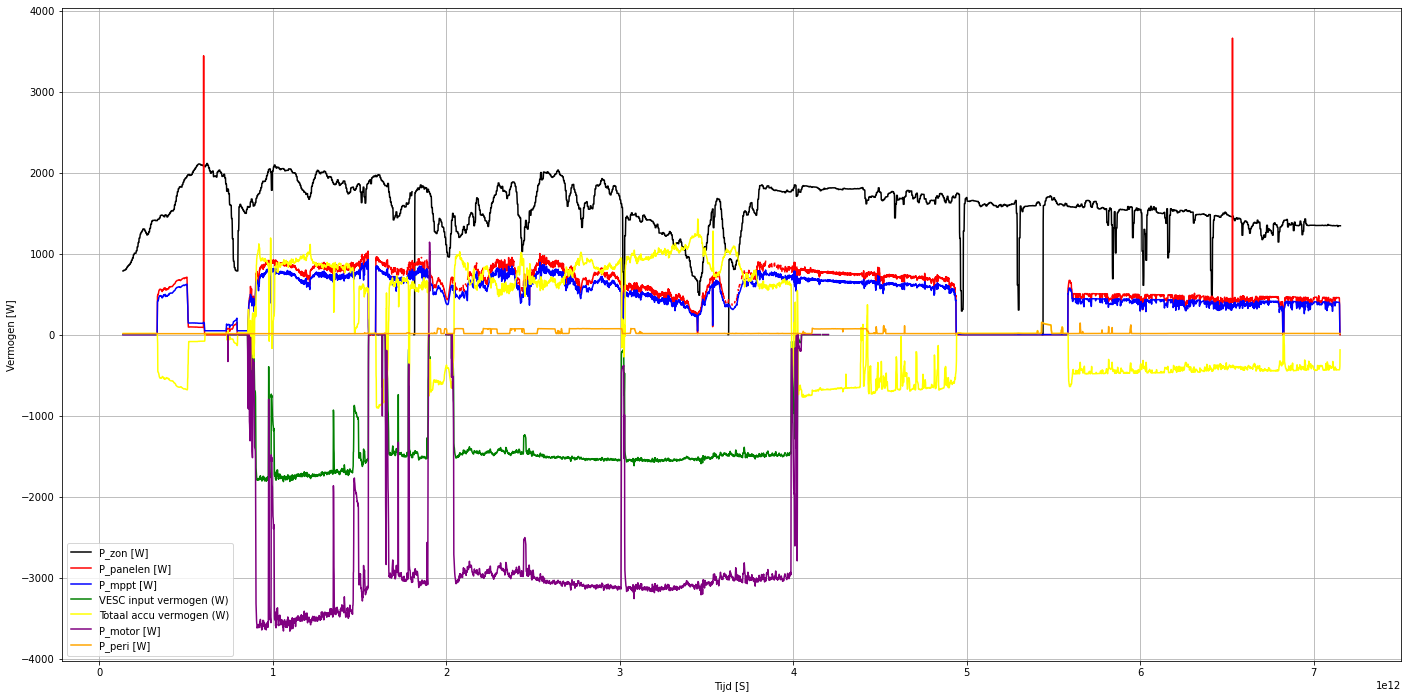

In [13]:
plt.figure(figsize=(24, 12))
plt.plot(data.index.to_numpy(), data['P_zon [W]'].to_numpy(),label='P_zon [W]',color='Black')
#plot all the solar panels
#plt.plot(data['P_paneel_1_1 [W]'])
#plt.plot(data['P_paneel_1_2 [W]'])
#plt.plot(data['P_paneel_1_3 [W]'])
#plt.plot(data['P_paneel_1_4 [W]'])
#plt.plot(data['P_paneel_1_5 [W]'])
#plt.plot(data['P_paneel_2_1 [W]'])
#plt.plot(data['P_paneel_2_2 [W]'])
#plt.plot(data['P_paneel_2_3 [W]'])
#plt.plot(data['P_paneel_2_4 [W]'])
#plt.plot(data['P_paneel_2_5 [W]'])

plt.plot(data.index.to_numpy(),data['P_panelen [W]'].to_numpy(),label='P_panelen [W]',color='Red')

#plt.plot(data['P_mppt_kanaal_1_1 [W]'][data['P_mppt_kanaal_1_1 [W]']<300])
#plt.plot(data['P_mppt_kanaal_1_2 [W]'][data['P_mppt_kanaal_1_2 [W]']<300])
#plt.plot(data['P_mppt_kanaal_2_1 [W]'][data['P_mppt_kanaal_2_1 [W]']<300])
#plt.plot(data['P_mppt_kanaal_2_2 [W]'][data['P_mppt_kanaal_2_2 [W]']<300])
#plt.plot(data['P_mppt_kanaal_3_1 [W]'][data['P_mppt_kanaal_3_1 [W]']<300])
#plt.plot(data['P_mppt_kanaal_3_2 [W]'][data['P_mppt_kanaal_3_2 [W]']<300])
#plt.plot(data['P_mppt_kanaal_4_1 [W]'][data['P_mppt_kanaal_4_1 [W]']<300])
#plt.plot(data['P_mppt_kanaal_4_2 [W]'][data['P_mppt_kanaal_4_2 [W]']<300])
#plt.plot(data['P_mppt_kanaal_5_1 [W]'][data['P_mppt_kanaal_5_1 [W]']<300])
#plt.plot(data['P_mppt_kanaal_5_2 [W]'][data['P_mppt_kanaal_5_2 [W]']<300])

plt.plot(data.index[data['P_mppt [W]']<1000].to_numpy(),data['P_mppt [W]'][data['P_mppt [W]']<1000].to_numpy(),label='P_mppt [W]',color='Blue')

plt.plot(data.index.to_numpy(),data['VESC input vermogen (W)'].to_numpy()*-1,label='VESC input vermogen (W)',color='Green')

plt.plot(data.index.to_numpy(),data['Totaal accu vermogen (W)'].to_numpy()*-1,label='Totaal accu vermogen (W)',color='Yellow')

plt.plot(data.index.to_numpy(),data['P_motor [W]'].to_numpy(),label='P_motor [W]',color='Purple')

plt.plot(data.index.to_numpy(),data['P_peri [W]'].to_numpy(),label='P_peri [W]',color='Orange')

plt.legend()
plt.xlabel('Tijd [S]')
plt.ylabel('Vermogen [W]')
plt.grid(True)

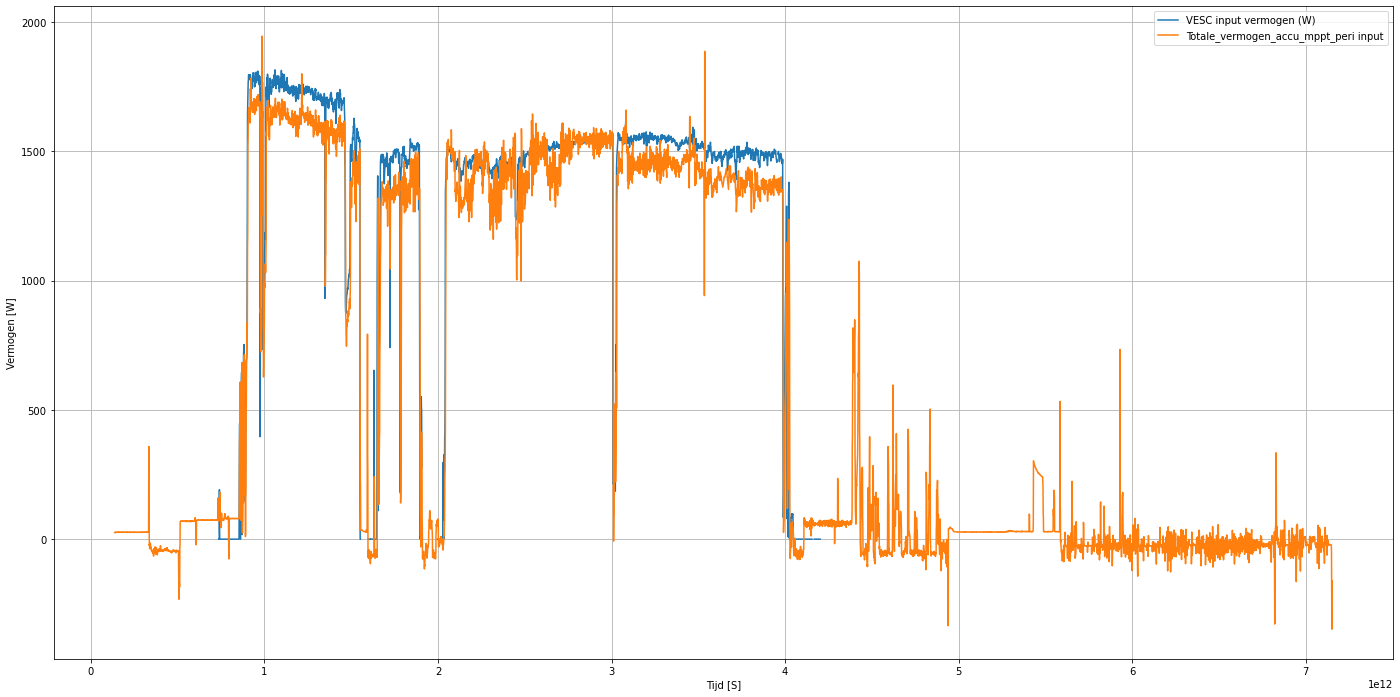

In [15]:
plt.figure(figsize=(24, 12))

#plt.plot(data.index[data['P_mppt [W]']<1000].to_numpy(),data['P_mppt [W]'][data['P_mppt [W]']<1000].to_numpy(),label='P_mppt [W]')

plt.plot(data.index.to_numpy(),data['VESC input vermogen (W)'].to_numpy(),label='VESC input vermogen (W)')

#plt.plot(data.index.to_numpy(),data['Totaal accu vermogen (W)'].to_numpy()*-1,label='Totaal accu vermogen (W)')

data['Totale_vermogen_accu_mppt_peri'] = (data['Totaal accu vermogen (W)'].to_numpy()-data['P_peri [W]'].to_numpy())*-1+data['P_mppt [W]'].to_numpy()
plt.plot(data.index[data['delta_input']<4000].to_numpy(),data['Totale_vermogen_accu_mppt_peri'][data['Totale_vermogen_accu_mppt_peri']<4000].to_numpy(),label='Totale_vermogen_accu_mppt_peri input')
plt.legend()
plt.xlabel('Tijd [S]')
plt.ylabel('Vermogen [W]')
plt.grid(True)

In [127]:
lib.plot_trajectory_map(data['7_Latitude'].dropna(), data['7_Longitude'].dropna(), data['7_Snelheid over de grond in km/h'].dropna())

In [57]:
#data = data[data["VESC input vermogen (W)"] > 0]
#data = data[data["VESC input vermogen (W)"] < 4000]
#data = data[data["Snelheid over de grond in km/h"] < 10000]
#data = data.iloc[50:-1]

In [17]:
# Example usage with the new dataset
data_new = data.copy()

data_new = lib.calculate_distance_from_speed(data_new)
data_new = lib.calculate_distance_from_gps(data_new)
#data_new = lib.calculate_total_energy_MPPTS(data_new)

KeyError: 'Snelheid over de grond in km/h'

In [44]:
def calculate_theoretical_distance(data, mass_kg=1000):
    """
    Calculate the theoretical distance assuming no resistances, using total energy available.
    
    Parameters:
    - data: DataFrame containing energy data.
    - mass_kg: Mass of the boat in kg (default is 1000 kg).
    
    Returns:
    - DataFrame with theoretical cumulative distance over time.
    """
    total_energy = data['VESC input vermogen (W)'].cumsum()
    total_energy = total_energy.fillna(0).clip(lower=0)  # Ensure no NaN or negative energy values
    
    # Calculate theoretical speed using E = 1/2 * m * v^2 -> v = sqrt(2 * E / m)
    data['Theoretical Speed (m/s)'] = np.sqrt(2 * total_energy / mass_kg)
    data['Theoretical Speed (m/s)'] = data['Theoretical Speed (m/s)'].fillna(0)  # Replace NaN values with 0
    
    # Calculate theoretical cumulative distance as speed * time interval
    data['Theoretical Distance (m)'] = data['Theoretical Speed (m/s)'].cumsum()
    return data

In [45]:
def bereken_snelheden(df, kolom_wattage,begin_snelheid = 0.01, massa=500, eta=0.7, rho_water=1000, Cd_water=0.3, A_water=0.6, rho_lucht=1.225, Cd_lucht=0.1, A_lucht=0.8, dt=1):
    """
    Bereken de snelheid van een boot op basis van een variabel vermogen.

    Parameters:
    df (pd.DataFrame): DataFrame met daarin de vermogensgegevens.
    kolom_wattage (str): Naam van de kolom die het vermogen (in watt) bevat.
    massa (float): Massa van de boot in kg (default: 500).
    eta (float): Efficiëntie van het voortstuwingssysteem (default: 0.7).
    rho_water (float): Dichtheid van water in kg/m³ (default: 1000).
    Cd_water (float): Weerstandscoëfficiënt voor water (default: 0.7).
    A_water (float): Nat oppervlak van de boot in m² (default: 3).
    rho_lucht (float): Dichtheid van lucht in kg/m³ (default: 1.225).
    Cd_lucht (float): Weerstandscoëfficiënt voor lucht (default: 1.0).
    A_lucht (float): Frontaal oppervlak van de boot in m² (default: 1.5).
    dt (float): Tijdsinterval in seconden (default: 0.1).

    Returns:
    pd.DataFrame: DataFrame met een extra kolom 'theoretische snelheid met weerstand' die de snelheid (in m/s) over de tijd bevat.
    """
    # Bereken de weerstandsfactor k op basis van de gegeven parameters
    k = 0.5 * (rho_water * Cd_water * A_water + rho_lucht * Cd_lucht * A_lucht)

    # Zorg ervoor dat de snelheid kolom wordt aangemaakt en initialiseer de eerste waarde
    snelheden = np.zeros(len(df))
    snelheden[0] = begin_snelheid  # Beginwaarde voor snelheid om deling door nul te vermijden

    # Iteratieve berekening van de snelheid voor elke tijdstap
    for i in range(1, len(df)):
        P_motor = df.iloc[i][kolom_wattage]
        v_oud = snelheden[i-1]
        
        if P_motor > 0 and v_oud > 0:
            F_aandrijving = (P_motor * eta) / v_oud
        else:
            F_aandrijving = 0
        
        F_weerstand = k * v_oud**2
        a = (F_aandrijving - F_weerstand) / massa
        snelheden[i] = v_oud + a * dt
        if snelheden[i] < 0:
            snelheden[i] = 0  # Snelheid kan niet negatief zijn

    # Voeg de snelheden toe aan de oorspronkelijke DataFrame
    df['theoretische snelheid met weerstand'] = snelheden
    return df

In [46]:
data_new = calculate_theoretical_distance(data_new)
data_new = bereken_snelheden(data_new, 'VESC input vermogen (W)')
data_new["Verschil snelheid grond en theoretisch"]= data_new["Snelheid over de grond in km/h"]-data_new['theoretische snelheid met weerstand']*3.6
data_new["Verschil snelheid water en theoretisch"]= data_new["Snelheid tenopzichte van het water in Kilometers per uur"]-data_new['theoretische snelheid met weerstand']*3.6

In [47]:
data_new

Latitude  Longitude  Snelheid over de grond in km/h  \
Indextijd                                                               
0 days 04:10:09  5110.6920   552.6617                             4.6   
0 days 04:10:10  5110.6922   552.6626                             4.4   
0 days 04:10:11  5110.6924   552.6632                             4.3   
0 days 04:10:12  5110.6924   552.6646                             4.3   
0 days 04:10:13  5110.6927   552.6652                             4.1   
...                    ...        ...                             ...   
0 days 14:53:25  5151.4300   552.2400                             8.9   
0 days 14:53:26  5151.4312   552.2407                             8.1   
0 days 14:53:27  5151.4324   552.2412                             7.4   
0 days 14:53:28  5151.4333   552.2416                             6.1   
0 days 14:53:29  5151.4340   552.2422                             4.4   

                 VESC input current (A)  \
Indextijd                                 
0 days 04:10:09                2.886000   
0 days 04:10:10                2.660000   
0 days 04:10:11                2.584000   
0 days 04:10:12                2.579000   
0 days 04:10:13                2.596667   
...                                 ...   
0 days 14:53:25                4.612000   
0 days 14:53:26                1.632000   
0 days 14:53:27               13.725000   
0 days 14:53:28               22.496000   
0 days 14:53:29               20.765000   

                 Snelheid tenopzichte van het water in Kilometers per uur  \
Indextijd                                                                   
0 days 04:10:09                                               4.65          
0 days 04:10:10                                               4.65          
0 days 04:10:11                                               4.65          
0 days 04:10:12                                               4.65          
0 days 04:10:13                                               4.65          
...                                                            ...          
0 days 14:53:25                                              11.74          
0 days 14:53:26                                               9.76          
0 days 14:53:27                                               9.20          
0 days 14:53:28                                               8.85          
0 days 14:53:29                                               7.80          

                 VESC input voltage (V)  VESC input vermogen (W)  \
Indextijd                                                          
0 days 04:10:09               30.390000                87.705540   
0 days 04:10:10               30.400000                80.864000   
0 days 04:10:11               30.380000                78.501920   
0 days 04:10:12               30.380000                78.350020   
0 days 04:10:13               30.366667                78.852111   
...                                 ...                      ...   
0 days 14:53:25               29.540000               136.238480   
0 days 14:53:26               29.550000                48.225600   
0 days 14:53:27               29.300000               402.142500   
0 days 14:53:28               29.050000               653.508800   
0 days 14:53:29               29.140000               605.092100   

                 Acceleratie boot tov grond  Acceleratie boot tov water  \
Indextijd                                                                 
0 days 04:10:09                         0.0                        0.00   
0 days 04:10:10                        -0.2                        0.00   
0 days 04:10:11                        -0.1                        0.00   
0 days 04:10:12                         0.0                        0.00   
0 days 04:10:13                        -0.2                        0.00   
...                                     ...                         ...   
0 days 14:53:25      

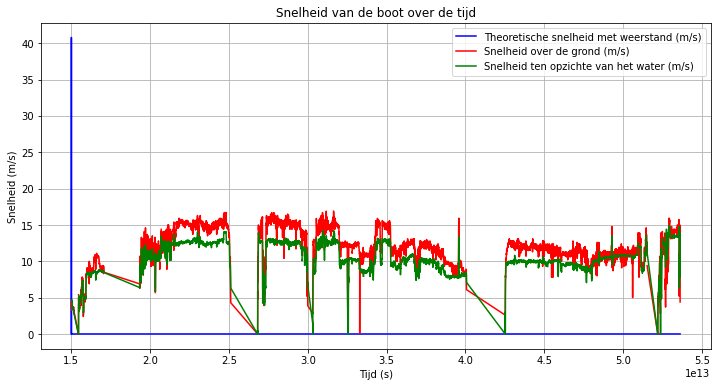

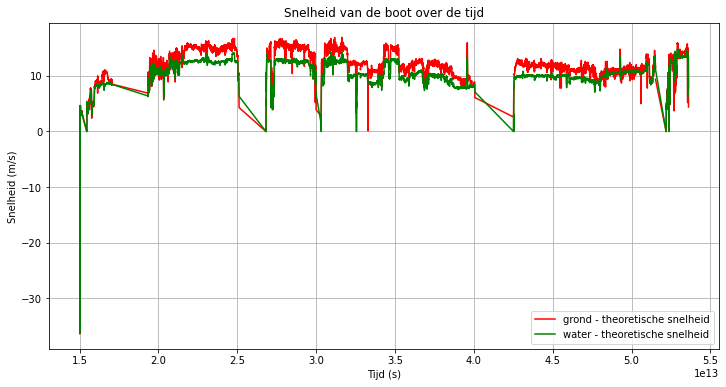

In [48]:
plt.figure(figsize=(12, 6))

# Plot de theoretische snelheid met weerstand
plt.plot(data_new.index, data_new['theoretische snelheid met weerstand']*3.6, label='Theoretische snelheid met weerstand (m/s)', color='b')

# Plot de snelheid over de grond
plt.plot(data_new.index, data_new['Snelheid over de grond in km/h'], label='Snelheid over de grond (m/s)', color='r')

# Plot de snelheid ten opzichte van het water
plt.plot(data_new.index, data_new['Snelheid tenopzichte van het water in Kilometers per uur'], label='Snelheid ten opzichte van het water (m/s)', color='g')

plt.xlabel('Tijd (s)')
plt.ylabel('Snelheid (m/s)')
plt.title('Snelheid van de boot over de tijd')
plt.legend()
plt.grid(True)
plt.show()
plt.figure(figsize=(12, 6))
plt.plot(data_new.index, data_new["Verschil snelheid grond en theoretisch"], label='grond - theoretische snelheid', color='r')
plt.plot(data_new.index,data_new['Verschil snelheid water en theoretisch'] , label='water - theoretische snelheid', color='g')
plt.xlabel('Tijd (s)')
plt.ylabel('Snelheid (m/s)')
plt.title('Snelheid van de boot over de tijd')
plt.legend()
plt.grid(True)
plt.show()

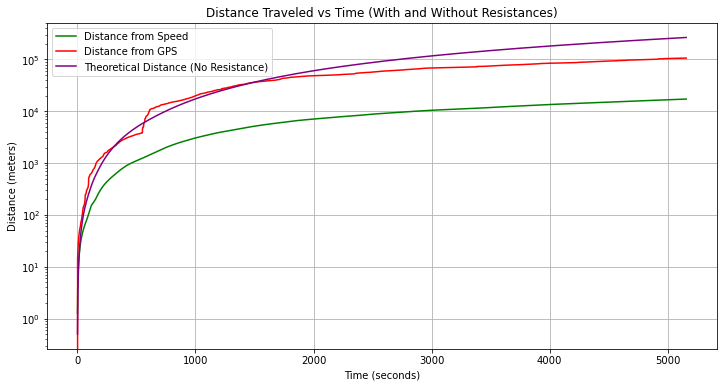

In [114]:
# Plotting distance traveled versus time for the four distance calculations
time = range(len(data_new))

plt.figure(figsize=(12, 6))

# Plot distance versus time
plt.plot(time, data_new['Cumulative Distance from Speed (m)'], label='Distance from Speed', color='green')
plt.plot(time, data_new['Cumulative Distance from GPS (m)'], label='Distance from GPS', color='red')
plt.plot(time, data_new['Theoretical Distance (m)'], label='Theoretical Distance (No Resistance)', color='purple', linestyle='-')
#plt.plot(time, data_new['Theoretical Distance with Resistance (m)'], label='Theoretical Distance with Resistance', color='blue', linestyle='--')

plt.xlabel('Time (seconds)')
plt.ylabel('Distance (meters)')
plt.title('Distance Traveled vs Time (With and Without Resistances)')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
#Only take the values that are not 0
latitude = merged_df['Latitude']
latitude = latitude[latitude != 0]
longitude = merged_df['Longitude']
longitude = longitude[longitude != 0]
#remove nan values from latitude and longitude
latitude = latitude.dropna()
longitude = longitude.dropna()


In [79]:
valid_data

Indextijd
0 days 00:02:20    False
0 days 00:02:21    False
0 days 00:02:22    False
0 days 00:02:23    False
0 days 00:02:24    False
                   ...  
0 days 15:05:42     True
0 days 15:05:43     True
0 days 15:05:44     True
0 days 15:05:45     True
0 days 15:05:46     True
Freq: S, Length: 54207, dtype: bool

In [5]:
# Clean up the data: Remove zero and NaN values from latitude, longitude, and speed
latitude = merged_df['Latitude']
longitude = merged_df['Longitude']
speed = merged_df['Snelheid over de grond in km/h']

# Filter out invalid values (0s, NaNs, and speed less than 100 km/h)
valid_data = (latitude != 0) & (longitude != 0) & latitude.notna() & longitude.notna() & speed.notna() & (speed < 100)


latitude = latitude[valid_data]
longitude = longitude[valid_data]
speed = speed[valid_data]

# Only take the data from the 15000th row
latitude = latitude[15000:]
longitude = longitude[15000:]
speed = speed[15000:]

# Downsample the data to improve performance (take every 10th point)
latitude = latitude[::10]
longitude = longitude[::10]
speed = speed[::10]

In [6]:
lib.plot_trajectory_map(latitude, longitude, speed)